In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [15]:
df = pd.read_csv('foot_traffic.csv')
df.head()

,date,foot_traffic
0,02/01/2000,500.496714
1,09/01/2000,500.522365
2,16/01/2000,501.426876
3,23/01/2000,503.295990
4,30/01/2000,504.132695


In [16]:
df['date'] = pd.to_datetime(df['date'], format="%d/%m/%Y").dt.strftime("%Y-%m-%d")
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

# df.index.freq = 'M'
df.index

DatetimeIndex(['2000-01-02', '2000-01-09', '2000-01-16', '2000-01-23',
               '2000-01-30', '2000-02-06', '2000-02-13', '2000-02-20',
               '2000-02-27', '2000-03-05',
               ...
               '2018-12-23', '2018-12-30', '2019-01-06', '2019-01-13',
               '2019-01-20', '2019-01-27', '2019-02-03', '2019-02-10',
               '2019-02-17', '2019-02-24'],
              dtype='datetime64[ns]', name='date', length=1000, freq=None)

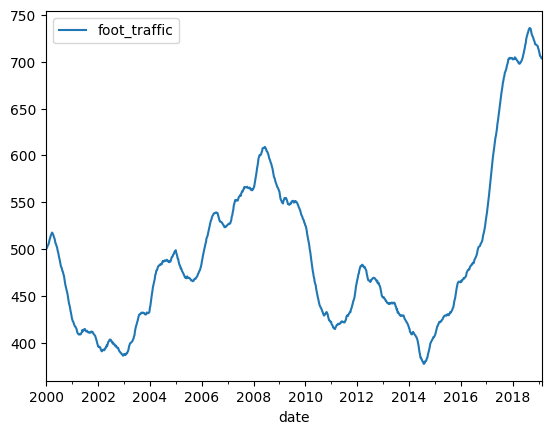

In [17]:
plt.show()

In [18]:
# Test fot stationary
ADP_result = adfuller(df['foot_traffic'])

print(f'ADF Statistic: {ADP_result[0]}')
print(f'p-value: {ADP_result[1]}')

ADF Statistic: -1.175888599651429
p-value: 0.6838808919049278


In [19]:
# not stationary p_value > 0.05

# Apply first-order differencing

foottraff_diff = np.diff(df['foot_traffic'], n=1)

In [20]:
# Run the ADP test on the differenced time series
ADP_result = adfuller(foottraff_diff)

print(f'ADP Statistics: {ADP_result[0]}')
print(f'p-value: {ADP_result[1]}')

ADP Statistics: -5.268231341170236
p-value: 6.369317843844851e-06


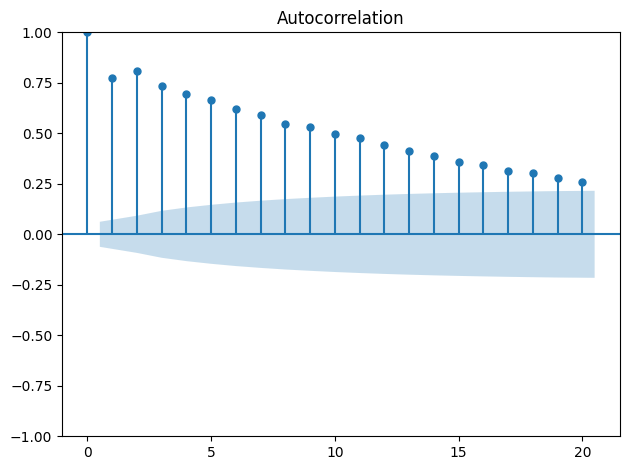

In [21]:
plot_acf(foottraff_diff, lags=20)
plt.tight_layout()

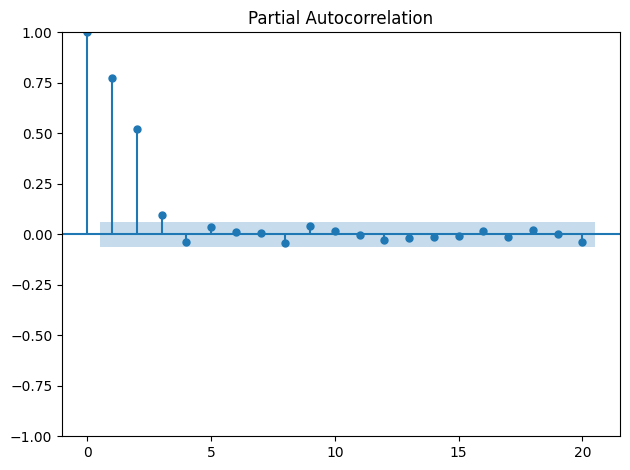

In [22]:
plot_pacf(foottraff_diff, lags=20)
plt.tight_layout()